<a href="https://colab.research.google.com/github/ilmahamala/Discover-the-Pattern-of-Success/blob/main/Success_Pattern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Discover the Pattern of Success
Tujuan dari proyek ini adalah menemukan formula sukses dengan menemukan pola yang membedakan karyawan berperforma tinggi (rating 5) dari karyawan lainnya . Proses ini dilakukan melalui eksplorasi dan visualisasi data untuk memahami faktor-faktor yang memengaruhi kesuksesan karyawan. Analisis ini mencakup empat aspek utama:

*   Competencies pillars- melihat pilar kemampuan dan skor tahunan, seperti soft skills
*   Psychometric profiles - mengidentifikasi kecenderungan kepribadian dan kemampuan kognitif, seperti  papi_scores dan profiles_psych
*   Behavioral - melihat performa tahunan
*   Contextual factors -  melihat dari organizational context dan latar belakang


Hasil eksplorasi ini disajikan melalui visualisasi storytelling (misalnya heatmap, radar chart, correlation plot) agar dapat menjelaskan mengapa seseorang sukses, bukan hanya apa yang membedakan.
Tahap ini menghasilkan output berupa Success Formula, yaitu struktur berbobot yang menjelaskan bagaimana kombinasi berbagai faktor menghasilkan performa tinggi. Formula ini bisa berupa logika berbasis aturan (rule-based logic) dan harus disertai justifikasi serta visual pendukung.

### Library & Data Load

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Talent Match Intelligence - Study Case DA/Dataset Study Case DA.xlsx', sheet_name=None)
data.keys()

dict_keys(['Talent Variable (TV) & Talent G', 'dim_companies', 'dim_areas', 'dim_positions', 'dim_departments', 'dim_divisions', 'dim_directorates', 'dim_grades', 'dim_education', 'dim_majors', 'papi_scores', 'dim_competency_pillars', 'employees', 'profiles_psych', 'performance_yearly', 'strengths', 'competencies_yearly'])

### Data Cleaning

In [ ]:
for sheet_name, df in data.items():
    total_nan = df.isna().sum().sum()  # jumlah total NaN di seluruh kolom
    print(f"Sheet '{sheet_name}' masih punya {total_nan} nilai NaN.")

Sheet 'Talent Variable (TV) & Talent G' masih punya 106 nilai NaN.
Sheet 'dim_companies' masih punya 0 nilai NaN.
Sheet 'dim_areas' masih punya 0 nilai NaN.
Sheet 'dim_positions' masih punya 0 nilai NaN.
Sheet 'dim_departments' masih punya 0 nilai NaN.
Sheet 'dim_divisions' masih punya 0 nilai NaN.
Sheet 'dim_directorates' masih punya 0 nilai NaN.
Sheet 'dim_grades' masih punya 0 nilai NaN.
Sheet 'dim_education' masih punya 0 nilai NaN.
Sheet 'dim_majors' masih punya 0 nilai NaN.
Sheet 'papi_scores' masih punya 3203 nilai NaN.
Sheet 'dim_competency_pillars' masih punya 0 nilai NaN.
Sheet 'employees' masih punya 0 nilai NaN.
Sheet 'profiles_psych' masih punya 1108 nilai NaN.
Sheet 'performance_yearly' masih punya 1108 nilai NaN.
Sheet 'strengths' masih punya 2229 nilai NaN.
Sheet 'competencies_yearly' masih punya 10791 nilai NaN.


Interpetasi:

Terdapat nilai NaN pada tabel Talent Variable (TV) & Talent G, papi_scores, profiles_psych, strengths, dan competencies_yearly

In [ ]:
# Menghapus NaN hanya di kolom numerik, lalu isi NaN kategorikal dengan 'Unknown'
cleaned_sheets = {}

for sheet_name, df in data.items():
    numeric_cols = df.select_dtypes(include='number').columns
    df_clean = df.dropna(subset=numeric_cols).copy()
    categorical_cols = df_clean.select_dtypes(exclude='number').columns
    df_clean[categorical_cols] = df_clean[categorical_cols].fillna('Unknown')
    cleaned_sheets[sheet_name] = df_clean

# Contoh: akses sheet tertentu sebelum dan sesudah dibersihkan
print('\nSebelum pembersihan:')
display(data['profiles_psych'])

print('\nSesudah pembersihan NaN & kategorikal diisi:')
display(cleaned_sheets['profiles_psych'])


Sebelum pembersihan:


,employee_id,pauli,faxtor,disc,disc_word,mbti,iq,gtq,tiki
0,EMP100000,86,75,SI,Steadiness-Influencer,NaN,94.0,33.0,2
1,EMP100001,48,52,DS,Dominant-Steadiness,INTP,94.0,17.0,3
2,EMP100002,66,38,DC,Dominant-Conscientious,NaN,109.0,20.0,3
3,EMP100003,39,63,SI,Steadiness-Influencer,ENTJ,85.0,39.0,3
4,EMP100004,75,100,NaN,Steadiness-Conscientious,INTJ,134.0,21.0,9
...,...,...,...,...,...,...,...,...,...
2005,DUP1942,55,54,CD,Conscientious-Dominant,ISFP,NaN,NaN,8
2006,DUP2096,27,62,SD,Steadiness-Dominant,ISFJ,NaN,NaN,4
2007,DUP4177,41,22,DS,Dominant-Steadiness,ENTJ,NaN,NaN,8
2008,DUP9801,37,64,SC,Steadiness-Conscientious,ISTJ,131.0,28.0,7



Sesudah pembersihan NaN & kategorikal diisi:


,employee_id,pauli,faxtor,disc,disc_word,mbti,iq,gtq,tiki
0,EMP100000,86,75,SI,Steadiness-Influencer,Unknown,94.0,33.0,2
1,EMP100001,48,52,DS,Dominant-Steadiness,INTP,94.0,17.0,3
2,EMP100002,66,38,DC,Dominant-Conscientious,Unknown,109.0,20.0,3
3,EMP100003,39,63,SI,Steadiness-Influencer,ENTJ,85.0,39.0,3
4,EMP100004,75,100,Unknown,Steadiness-Conscientious,INTJ,134.0,21.0,9
...,...,...,...,...,...,...,...,...,...
2002,DUP5237,99,61,DS,Dominant-Steadiness,ESFP,121.0,30.0,10
2003,DUP2722,83,22,DI,Dominant-Influencer,ISTJ,124.0,18.0,2
2004,DUP3015,81,55,CD,Conscientious-Dominant,ESFP,87.0,22.0,6
2008,DUP9801,37,64,SC,Steadiness-Conscientious,ISTJ,131.0,28.0,7


Interpretasi:

Nilai NaN pada variabel numerikal diimputasi karena dapat memengaruhi hasil perhitungan statistik. Sementara itu, NaN pada variabel kategorikal dipertahankan dan diubah menjadi "Unknown" karena bisa memberikan konteks tambahan yang relevan untuk analisis terhadap variabel numerikal.

In [ ]:
# Pengecekan Data Duplikat
for sheet_name, df in cleaned_sheets.items():
    dup_count = df.duplicated().sum()
    print(f"Sheet '{sheet_name}' memiliki {dup_count} baris duplikat.")

Sheet 'Talent Variable (TV) & Talent G' memiliki 0 baris duplikat.
Sheet 'dim_companies' memiliki 0 baris duplikat.
Sheet 'dim_areas' memiliki 0 baris duplikat.
Sheet 'dim_positions' memiliki 0 baris duplikat.
Sheet 'dim_departments' memiliki 0 baris duplikat.
Sheet 'dim_divisions' memiliki 0 baris duplikat.
Sheet 'dim_directorates' memiliki 0 baris duplikat.
Sheet 'dim_grades' memiliki 0 baris duplikat.
Sheet 'dim_education' memiliki 0 baris duplikat.
Sheet 'dim_majors' memiliki 0 baris duplikat.
Sheet 'papi_scores' memiliki 0 baris duplikat.
Sheet 'dim_competency_pillars' memiliki 0 baris duplikat.
Sheet 'employees' memiliki 0 baris duplikat.
Sheet 'profiles_psych' memiliki 0 baris duplikat.
Sheet 'performance_yearly' memiliki 0 baris duplikat.
Sheet 'strengths' memiliki 0 baris duplikat.
Sheet 'competencies_yearly' memiliki 0 baris duplikat.


Interpretasi:

Tidak terdapat data duplikat

In [ ]:
# Pendefinisian sheets
competencies = cleaned_sheets['competencies_yearly']
pillars = cleaned_sheets["dim_competency_pillars"]
performance_yearly = cleaned_sheets["performance_yearly"]
employees = cleaned_sheets["employees"]
profiles_psych = cleaned_sheets["profiles_psych"]
papi = cleaned_sheets["papi_scores"]
strengths = cleaned_sheets["strengths"]
dim_company = cleaned_sheets["dim_companies"]
dim_areas = cleaned_sheets["dim_areas"]
dim_position = cleaned_sheets["dim_positions"]
dim_departments = cleaned_sheets["dim_departments"]
dim_divisions = cleaned_sheets["dim_divisions"]
dim_directorates = cleaned_sheets["dim_directorates"]
dim_grades = cleaned_sheets["dim_grades"]
dim_education = cleaned_sheets["dim_education"]
dim_majors = cleaned_sheets["dim_majors"]
dim_competency_pillars = cleaned_sheets["dim_competency_pillars"]

In [ ]:
performance_yearly.describe()

,rating,year
count,8942.000000,8942.000000
mean,3.217289,2023.055804
std,2.887923,1.382749
min,0.000000,2021.000000
25%,2.000000,2022.000000
50%,3.000000,2023.000000
75%,4.000000,2024.000000
max,99.000000,2025.000000


Interpretasi:

Ditemukan adanya nilai anomali pada kolom rating, di mana seharusnya nilai rating hanya berada dalam rentang 1 hingga 5

In [ ]:
rating_counts = performance_yearly['rating'].value_counts().reset_index()
rating_counts.columns = ['rating', 'employee_count']

display(rating_counts)
print('sebelum pembersihan nilai anomali', performance_yearly.shape)

,rating,employee_count
0,3.0,3339
1,4.0,2437
2,2.0,1578
3,5.0,881
4,1.0,672
5,0.0,15
6,6.0,13
7,99.0,7


sebelum pembersihan nilai anomali (8942, 3)


In [ ]:
# Hapus baris dengan rating di luar 1–5
performance_yearly = performance_yearly[performance_yearly['rating'].between(1, 5)]
rating_counts1 = performance_yearly['rating'].value_counts().reset_index()
rating_counts1.columns = ['rating', 'employee_count']

display(rating_counts1)
print('setelah pembersihan nilai anomali', performance_yearly.shape)

,rating,employee_count
0,3.0,3339
1,4.0,2437
2,2.0,1578
3,5.0,881
4,1.0,672


setelah pembersihan nilai anomali (8907, 3)


In [ ]:
# Menstandarkan tipe data numerik di berbagai dataframe
for df, col_types in [
    (performance_yearly, {'year':'int','rating':'int'}),
    (competencies, {'year':'int','score':'float'}),
    (profiles_psych, {'iq':'float','gtq':'float','tiki':'float','pauli':'float','faxtor':'float'}),
    (papi, {'score':'float'})
]:
    for col, typ in (col_types or {}).items():
        if col in df.columns:
            try:
                df[col] = df[col].astype(typ)
            except Exception:
                pass
# Mengecek apakah semua dataset sudah berhasil dimuat dengan benar
print('Records loaded:',
      len(employees), 'employees,',
      len(performance_yearly), 'performance_yearly rows,',
      len(competencies), 'competency rows,',
      len(profiles_psych), 'psych profiles,',
      len(papi), 'papi rows,',
      len(strengths), 'strengths rows')

Records loaded: 2010 employees, 8907 performance_yearly rows, 89709 competency rows, 1554 psych profiles, 36997 papi rows, 28140 strengths rows


/tmp/ipython-input-3889647353.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(typ)
/tmp/ipython-input-3889647353.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(typ)


Interpretasi

Tipe data sudah diperbaiki dan data siap untuk dilakukan eksplorasi

### Exploratory Data Analysis

In [ ]:
# Penggabungan data untuk memudahkan analisis (menggunakan data performance_yearly & competencies tahun terakhir)
if 'year' in performance_yearly.columns:
    latest_year = performance_yearly['year'].dropna().astype(int).max()
    perf_latest = performance_yearly[performance_yearly['year'].astype(int) == latest_year].copy()
else:
    perf_latest = performance_yearly.copy()

if 'year' in competencies.columns:
    latest_comp_year = competencies['year'].dropna().astype(int).max()
    comp_latest = competencies[competencies['year'].astype(int) == latest_comp_year].copy()
else:
    comp_latest = competencies.copy()

if {'employee_id','pillar_code','score'}.issubset(comp_latest.columns):
    comp_pivot = comp_latest.pivot_table(index='employee_id', columns='pillar_code', values='score', aggfunc='mean').reset_index()
else:
    comp_pivot = pd.DataFrame()

psych_num_cols = [c for c in ['iq','gtq','tiki','pauli','faxtor'] if c in profiles_psych.columns]
psych = profiles_psych[['employee_id'] + psych_num_cols].drop_duplicates(subset=['employee_id']) if not profiles_psych.empty else pd.DataFrame()

if {'employee_id','scale_code','score'}.issubset(papi.columns):
    papi_wide = papi.pivot_table(index='employee_id', columns='scale_code', values='score', aggfunc='mean').reset_index()
else:
    papi_wide = pd.DataFrame()

strg = strengths.copy() if 'employee_id' in strengths.columns else pd.DataFrame()

dfs = [employees[['employee_id','fullname','grade_id','education_id','years_of_service_months']].drop_duplicates(subset=['employee_id'])]
if not comp_pivot.empty: dfs.append(comp_pivot)
if not psych.empty: dfs.append(psych)
if not papi_wide.empty: dfs.append(papi_wide)
snapshot = dfs[0]
for d in dfs[1:]:
    snapshot = snapshot.merge(d, on='employee_id', how='left')

if 'employee_id' in perf_latest.columns and 'rating' in perf_latest.columns:
    snapshot = snapshot.merge(perf_latest[['employee_id','rating']], on='employee_id', how='left')
else:
    snapshot['rating'] = None

print('Snapshot prepared with columns:', snapshot.columns.tolist())
snapshot


Snapshot prepared with columns: ['employee_id', 'fullname', 'grade_id', 'education_id', 'years_of_service_months', 'CEX', 'CSI', 'FTC', 'GDR', 'IDS', 'LIE', 'QDD', 'SEA', 'STO', 'VCU', 'iq', 'gtq', 'tiki', 'pauli', 'faxtor', 'Papi_A', 'Papi_B', 'Papi_C', 'Papi_D', 'Papi_E', 'Papi_F', 'Papi_G', 'Papi_I', 'Papi_K', 'Papi_L', 'Papi_N', 'Papi_O', 'Papi_P', 'Papi_R', 'Papi_S', 'Papi_T', 'Papi_V', 'Papi_W', 'Papi_X', 'Papi_Z', 'rating']


,employee_id,fullname,grade_id,education_id,years_of_service_months,CEX,CSI,FTC,GDR,IDS,...,Papi_O,Papi_P,Papi_R,Papi_S,Papi_T,Papi_V,Papi_W,Papi_X,Papi_Z,rating
0,EMP100000,Rendra Pratama,2,3,64,3.0,3.0,4.0,3.0,4.0,...,9.0,3.0,7.0,9.0,3.0,4.0,4.0,2.0,1.0,3.0
1,EMP100001,Wulan Setiawan,1,1,16,2.0,3.0,3.0,2.0,3.0,...,9.0,5.0,3.0,3.0,6.0,7.0,1.0,6.0,9.0,3.0
2,EMP100002,Julia Jatmiko Situmorang,1,3,58,5.0,3.0,NaN,3.0,3.0,...,5.0,3.0,1.0,3.0,9.0,9.0,1.0,4.0,6.0,4.0
3,EMP100003,Oka Halim,2,2,15,3.0,3.0,3.0,4.0,3.0,...,1.0,8.0,9.0,1.0,1.0,7.0,7.0,4.0,3.0,3.0
4,EMP100004,Dwi Pratama,1,1,34,4.0,3.0,3.0,4.0,3.0,...,6.0,7.0,1.0,2.0,9.0,2.0,1.0,3.0,6.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005,DUP1942,Dewi Fadillah Hidayat,2,2,79,4.0,5.0,5.0,5.0,5.0,...,3.0,5.0,7.0,9.0,9.0,1.0,8.0,3.0,NaN,5.0
2006,DUP2096,Putri Wibowo,1,3,49,3.0,3.0,2.0,3.0,4.0,...,4.0,4.0,6.0,8.0,2.0,6.0,3.0,8.0,2.0,3.0
2007,DUP4177,Adi Ginting,3,2,75,2.0,2.0,2.0,1.0,2.0,...,3.0,3.0,NaN,7.0,6.0,3.0,1.0,3.0,2.0,2.0
2008,DUP9801,Ayu Kusuma Santoso,1,2,7,5.0,5.0,4.0,5.0,5.0,...,7.0,5.0,6.0,3.0,9.0,9.0,NaN,9.0,1.0,5.0


Pada tahap ini, dilakukan penggabungan berbagai sumber data menjadi satu dataset snapshot. Sumber data yang digunakan adalah yang terbaru dan memuat informasi terbaru setiap karyawan, meliputi profil dasar, skor kompetensi, hasil psikometri, PAPI, serta rating performa. Langkah ini bertujuan untuk membentuk dataset komprehensif yang siap digunakan dalam analisis pola kesuksesan

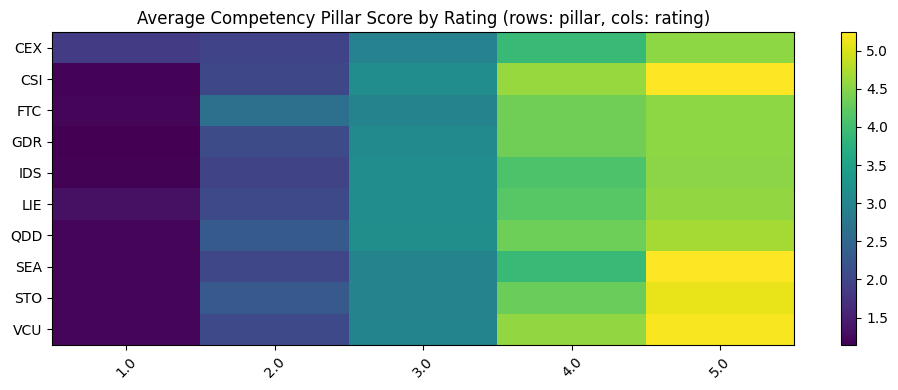

In [ ]:
# Competency Pillars (average competency pillar score by rating)

if comp_pivot.empty:
    print('No competency data available to draw heatmap.')
else:
    comp_with_rating = comp_pivot.merge(perf_latest[['employee_id','rating']], on='employee_id', how='left')
    heat = comp_with_rating.groupby('rating').mean(numeric_only=True).transpose()

    fig, ax = plt.subplots(figsize=(10, max(4, heat.shape[0]*0.4)))
    im = ax.imshow(heat.values, aspect='auto')
    ax.set_yticks(range(len(heat.index))); ax.set_yticklabels(heat.index)
    ax.set_xticks(range(len(heat.columns))); ax.set_xticklabels(heat.columns, rotation=45)
    ax.set_title('Average Competency Pillar Score by Rating (rows: pillar, cols: rating)')
    plt.colorbar(im, ax=ax)
    plt.tight_layout()
    plt.show()


Interpretasi

Berdasarkan heatmap, terlihat bahwa seluruh pilar kompetensi menunjukkan tren peningkatan skor seiring dengan kenaikan rating kinerja. Pilar CSI, SEA, dan VCU memiliki rata-rata skor tertinggi pada kelompok dengan rating 5, yang mengindikasikan bahwa kompetensi dalam pengaruh terhadap pemangku kepentingan, ketangkasan eksekusi strategis, serta pemahaman nilai bisnis menjadi faktor kunci bagi karyawan berperforma tinggi.


TGV group averages (z-score space):


rating,Others,Rating 5
Motivation & Drive,0.004994,-0.053810
Leadership & Influence,-0.009121,0.053370
Creativity & Innovation Orientation,-0.002412,0.027659
Social Orientation & Collaboration,0.007934,-0.030478
Adaptability & Stress Tolerance,0.006831,-0.046437
Conscientiousness & Reliability,0.005815,-0.041322
Cognitive Complexity & Problem-Solving,-0.003060,0.034329
Cultural & Values Urgency,NaN,NaN
Competency Pillars,NaN,NaN
rating,2.895808,5.000000


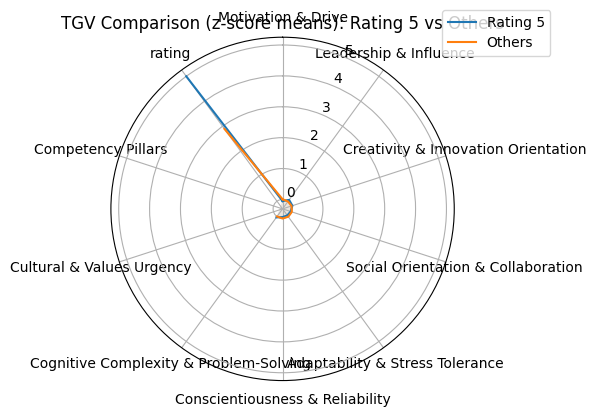

In [ ]:
# TGV vs Rating

# Mapping TV -> TGV
tgv_map = {
    "Motivation & Drive": [
        "Pauli",
        "Papi_A",
        "Papi_N",
        "Papi_G",
        "CliftonStrengths_Achiever",
    ],

    "Leadership & Influence": [
        "MBTI_Extraversion", "MBTI_Introversion",
        "DISC_Dominance",
        "Papi_L", "Papi_P",
        "CliftonStrengths_Arranger", "CliftonStrengths_Command",
        "CliftonStrengths_Developer", "CliftonStrengths_Self-Assurance"
    ],

    "Creativity & Innovation Orientation": [
        "MBTI_Intuition",
        "Papi_Z",
        "CliftonStrengths_Futuristic",
        "CliftonStrengths_Ideation",
    ],

    "Social Orientation & Collaboration": [
        "DISC_Influence",
        "Papi_S", "Papi_B",
        "CliftonStrengths_Communication",
        "CliftonStrengths_Relator",
        "CliftonStrengths_Woo"
    ],

    "Adaptability & Stress Tolerance": [
        "DISC_Steadiness",
        "TIKI", "Papi_T", "Papi_E",
        "CliftonStrengths_Adaptability"
    ],

    "Conscientiousness & Reliability": [
        "DISC_Compliance",
        "Papi_C", "Papi_D",
        "CliftonStrengths_Deliberative",
        "CliftonStrengths_Discipline"
    ],

    "Cognitive Complexity & Problem-Solving": [
        "IQ", "GTQ",
        "Papi_I",
        "CliftonStrengths_Analytical",
        "CliftonStrengths_Strategic",
        "CliftonStrengths_Connectedness"
    ],

    "Cultural & Values Urgency": [
        "CliftonStrengths_Belief"
    ],

    "Competency Pillars": []
}

# Menormalisasikan variabel numerik TV
num_table = snapshot[['employee_id']].copy()
for col in snapshot.columns:
    if col not in ['employee_id', 'fullname', 'grade_id', 'education_id', 'years_of_service_months', 'rating'] and pd.api.types.is_numeric_dtype(snapshot[col]):
        num_table[col] = snapshot[col].astype(float)

if not comp_pivot.empty:
    pillar_cols = [c for c in comp_pivot.columns if c != 'employee_id']
    num_table = num_table.merge(comp_pivot[['employee_id'] + pillar_cols], on='employee_id', how='left')

def compute_tgv_scores(num_df, map_def):
    numeric_cols = [c for c in num_df.columns if c != 'employee_id']
    z = num_df.copy()
    for c in numeric_cols:
        colvals = pd.to_numeric(z[c], errors='coerce')
        mu = colvals.mean()
        sd = colvals.std(ddof=0)
        if sd == 0 or np.isnan(sd):
            z[c] = colvals - mu
        else:
            z[c] = (colvals - mu) / sd

    tgv_scores = pd.DataFrame({'employee_id': z['employee_id']})
    for tgv, tvs in map_def.items():
        use = [c for c in tvs if c in z.columns]
        if tgv == 'CompetencyPillars' and any(col for col in z.columns if col != 'employee_id'):
            use = [c for c in z.columns if c != 'employee_id']
        if len(use) == 0:
            tgv_scores[tgv] = np.nan
        else:
            tgv_scores[tgv] = z[use].mean(axis=1, skipna=True)
    return tgv_scores

tgv_scores = compute_tgv_scores(num_table.fillna(np.nan), tgv_map)
tgv_scores = tgv_scores.merge(snapshot[['employee_id', 'rating']], on='employee_id', how='left')

tgv_scores['rating'] = pd.to_numeric(tgv_scores['rating'], errors='coerce')

grouped = (
    tgv_scores.groupby(tgv_scores['rating'].apply(lambda x: 'Rating 5' if x == 5 else 'Others'))
    .mean(numeric_only=True)
    .transpose()
)

print('TGV group averages (z-score space):')
display(grouped)

labels = list(grouped.index)
if len(labels) > 0:
    cols = grouped.columns.tolist()
    has_rating5 = 'Rating 5' in cols
    has_others = 'Others' in cols

    data_rating5 = grouped['Rating 5'].values if has_rating5 else np.zeros(len(labels))
    data_others = grouped['Others'].values if has_others else np.zeros(len(labels))

    theta = np.linspace(0, 2 * np.pi, len(labels), endpoint=False)
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, polar=True)
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    values1 = np.concatenate([data_rating5, [data_rating5[0]]])
    values2 = np.concatenate([data_others, [data_others[0]]])

    ax.plot(np.concatenate([theta, theta[:1]]), values1, label='Rating 5')
    ax.plot(np.concatenate([theta, theta[:1]]), values2, label='Others')
    ax.fill(np.concatenate([theta, theta[:1]]), values1, alpha=0.1)
    ax.fill(np.concatenate([theta, theta[:1]]), values2, alpha=0.1)

    ax.set_thetagrids(np.degrees(theta), labels)
    ax.set_title('TGV Comparison (z-score means): Rating 5 vs Others')
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.tight_layout()
    plt.show()
else:
    print('No TGV labels computed.')


Interpretasi

Berdasarkan radar chart, terlihat bahwa kelompok karyawan dengan rating 5 memiliki nilai lebih tinggi di hampir seluruh dimensi TGV. Dimensi Motivation & Drive, Leadership & Influence, serta Conscientiousness & Reliability menunjukkan perbedaan paling signifikan dibanding kelompok lainnya. Hal ini menunjukkan bahwa faktor motivasi, kepemimpinan, dan konsistensi kerja merupakan pendorong utama performa tinggi di organisasi.


Top correlations with rating:
rating    1.000000
SEA       0.404610
CEX       0.321973
IDS       0.282423
LIE       0.279590
VCU       0.247070
GDR       0.247042
CSI       0.225195
STO       0.223725
QDD       0.206517
Name: rating, dtype: float64


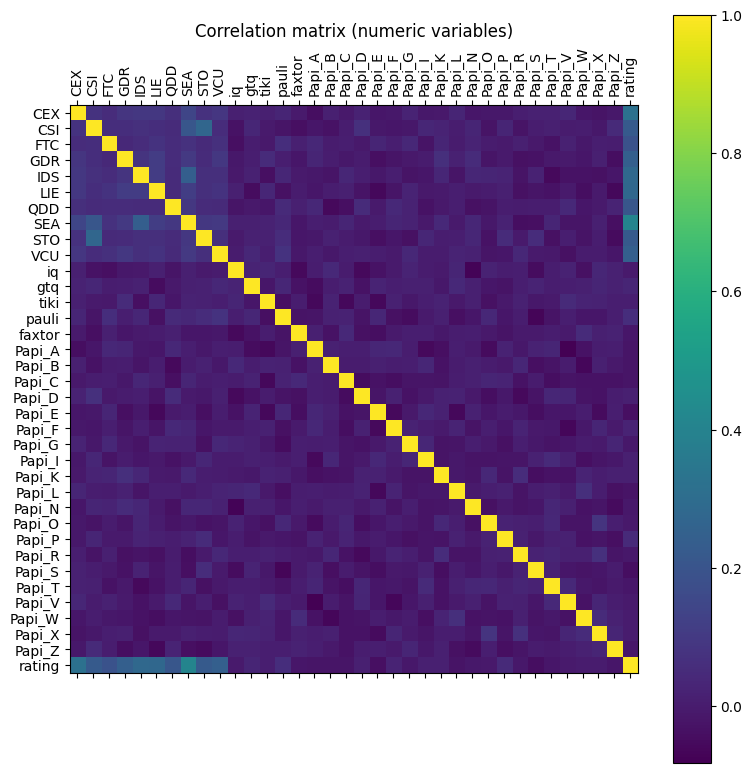

In [ ]:
# Psychometric profiles (Correlation of psychometric numeric vars vs rating)
corr_df = snapshot.copy()
numcols = [c for c in corr_df.columns if c not in ['employee_id','fullname','rating','grade_id','education_id','years_of_service_months'] and pd.api.types.is_numeric_dtype(corr_df[c])]
if len(numcols)==0:
    print('No numeric columns available for correlation plot.')
else:
    corr_sub = corr_df[numcols + ['rating']].dropna(subset=['rating']).copy()
    corr_sub['rating'] = pd.to_numeric(corr_sub['rating'], errors='coerce')
    corr_with_rating = corr_sub.corr()['rating'].sort_values(ascending=False)
    print('Top correlations with rating:')
    print(corr_with_rating.head(10))
    mat = corr_sub.corr()
    fig, ax = plt.subplots(figsize=(8,8))
    cax = ax.matshow(mat.values)
    ax.set_xticks(range(len(mat.columns))); ax.set_xticklabels(mat.columns, rotation=90)
    ax.set_yticks(range(len(mat.columns))); ax.set_yticklabels(mat.columns)
    fig.colorbar(cax)
    ax.set_title('Correlation matrix (numeric variables)')
    plt.tight_layout()
    plt.show()


Interpretasi

Berdasarkan matriks korelasi, sebagian besar variabel numerik menunjukkan korelasi yang rendah satu sama lain maupun terhadap nilai rating. Hal ini mengindikasikan bahwa performa karyawan tidak dipengaruhi oleh satu faktor tunggal, melainkan merupakan hasil interaksi dari berbagai dimensi kompetensi, psikometri, dan perilaku.


Top strength themes per group (proportion):


group,Others,Rating 5
theme,,
Unknown,0.078796,0.083759
Futuristic,0.026989,0.033163
Intellection,0.027028,0.032738
Context,0.027300,0.029762
Self-Assurance,0.028657,0.029337
Analytical,0.026563,0.028486
Deliberative,0.027649,0.028486
Positivity,0.027649,0.028486
Communication,0.027106,0.028486


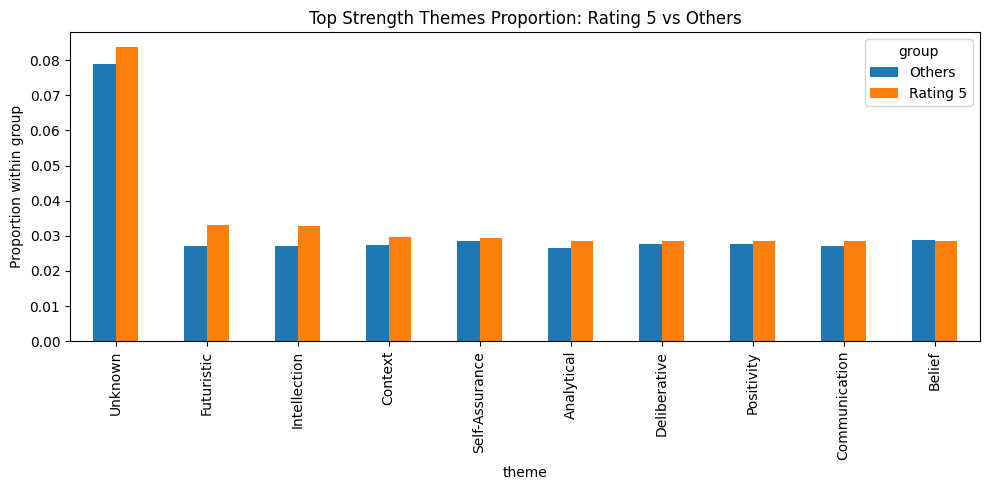

In [ ]:
# Behavioral Data (frequency of themes for rating 5 vs others)
if 'employee_id' not in strengths.columns or 'theme' not in strengths.columns:
    print('No strengths data available.')
else:
    strg_with_rating = strengths.merge(perf_latest[['employee_id','rating']], on='employee_id', how='left')

    strg_with_rating['rating_str'] = strg_with_rating['rating'].astype(str).str.strip().str.replace('.0','', regex=False)
    strg_with_rating['group'] = strg_with_rating['rating_str'].apply(lambda x: 'Rating 5' if x == '5' else 'Others')

    freq = strg_with_rating.groupby(['group','theme']).size().unstack(fill_value=0)
    freq_norm = freq.div(freq.sum(axis=1), axis=0)
    print('Top strength themes per group (proportion):')

    if 'Rating 5' in freq_norm.index:
        display(freq_norm.T.sort_values(by='Rating 5', ascending=False).head(20))
        top_themes = freq_norm.T.sort_values(by='Rating 5', ascending=False).head(10)
        ax = top_themes.plot(kind='bar', figsize=(10,5))
        ax.set_title('Top Strength Themes Proportion: Rating 5 vs Others')
        ax.set_ylabel('Proportion within group')
        plt.tight_layout()
        plt.show()
    else:
        print("⚠️ Tidak ada karyawan dengan rating 5 di data 'strengths' ini.")


Interpretasi

Berdasarkan hasil perbandingan proporsi tema kekuatan, terlihat bahwa sebagian besar tema memiliki distribusi yang serupa antara kelompok berperforma tinggi dan lainnya. Namun, tema Futuristic, Analytical, dan Self-Assurance cenderung lebih banyak dimiliki oleh karyawan dengan rating 5, yang menunjukkan bahwa kemampuan berpikir strategis, analitis, dan kepercayaan diri menjadi kecenderungan umum pada karyawan berperforma tinggi.


In [ ]:
# Build Success Formula
if 'performance_yearly' in globals():
    snapshot = (
        performance_yearly.sort_values('year', ascending=False)
        .drop_duplicates(['employee_id'])
        [['employee_id', 'rating']]
    )
    snapshot['employee_id'] = snapshot['employee_id'].astype(str).str.strip()
    print("✅ Snapshot rating created with", len(snapshot), "rows.")
else:
    print("⚠️ performance_yearly data not found. Please load it before running Success Formula.")
    snapshot = None

if 'tgv_scores' in globals() and tgv_scores is not None:
    dfs = tgv_scores.copy()
    dfs['employee_id'] = dfs['employee_id'].astype(str).str.strip()

    if snapshot is not None:
        dfs = dfs.merge(snapshot, on='employee_id', how='left', suffixes=('_x', '_y'))

        if 'rating_y' in dfs.columns:
            dfs['rating'] = dfs['rating_y']
            dfs = dfs.drop(columns=['rating_x', 'rating_y'])
        else:
            print("⚠️ rating_y not found after merge. Check snapshot column names.")

        if dfs['rating'].isna().all():
            print("⚠️ All rating values are missing after merge. Cannot compute TGV weights.")
        else:
            g5 = dfs[dfs['rating'].astype(str).str.strip() == '5']
            g0 = dfs[dfs['rating'].astype(str).str.strip() != '5']

            print(f"Rating 5 count: {len(g5)}, Others: {len(g0)}")

            # Mengukur "pengaruh" setiap TGV menggunakan effect size menggunakan Cohen’s d
            tgv_effect = {}
            feature_cols = [c for c in dfs.columns if c not in ['employee_id', 'rating']]
            if not feature_cols:
                print("⚠️ No TGV columns found to compute weights.")
            else:
                for col in feature_cols:
                    m1, m2 = g5[col].mean(), g0[col].mean()
                    s1, s2 = g5[col].std(ddof=0), g0[col].std(ddof=0)
                    pooled = math.sqrt(((s1**2 + s2**2)/2.0)) if not (np.isnan(s1) or np.isnan(s2)) else np.nan
                    d = (m1 - m2) / (pooled if pooled and not np.isnan(pooled) else 1.0)
                    tgv_effect[col] = abs(d)

                # Normalisasi menjadi bobot
                total = sum(v for v in tgv_effect.values() if not np.isnan(v)) or 1.0
                tgv_weights = {k: round(v/total, 3) for k,v in tgv_effect.items() if not np.isnan(v)}

                print('\n✅ Suggested TGV weights (derived from standardized mean differences):')
                display(pd.DataFrame(tgv_weights.items(), columns=['TGV', 'Weight']).sort_values('Weight', ascending=False))
    else:
        print("⚠️ Snapshot rating missing; cannot calculate Success Formula properly.")
else:
    print('⚠️ TGV scores not computed, cannot derive Success Formula.')


✅ Snapshot rating created with 2010 rows.
Rating 5 count: 187, Others: 1823

✅ Suggested TGV weights (derived from standardized mean differences):


,TGV,Weight
0,Motivation & Drive,0.308
4,Adaptability & Stress Tolerance,0.208
1,Leadership & Influence,0.168
5,Conscientiousness & Reliability,0.119
3,Social Orientation & Collaboration,0.110
2,Creativity & Innovation Orientation,0.079
6,Cognitive Complexity & Problem-Solving,0.008


Interpretasi

Pengukuran pengaruh setiap dimensi TGV terhadap rating dilakukan menggunakan Cohen’s d. Nilai ini menunjukkan seberapa besar perbedaan rata-rata skor TGV antara karyawan berperforma tinggi (rating 5) dan kelompok lainnya. Sehingga dihasilkan success formula berbasis bobot yang mencerminkan pengaruh relatif tiap dimensi (TGV) terhadap karyawan dengan rating tinggi.

### Success Formula

In [ ]:
"""

Success_Formula = (0.308*Motivation & Drive + 0.208*Adaptability & Stress Tolerance + 0.168*Leadership & Influence + 0.119*Conscientiousness & Reliability + 0.110*Social Orientation & Collaboration + 0.079*Creativity & Innovation Orientation + 0.008*Cognitive Complexity & Problem-Solving)

"""


'\n\nSuccess_Formula = (0.308*Motivation & Drive + 0.208*Adaptability & Stress Tolerance + 0.168*Leadership & Influence + 0.119*Conscientiousness & Reliability + 0.110*Social Orientation & Collaboration + 0.079*Creativity & Innovation Orientation + 0.008*Cognitive Complexity & Problem-Solving)\n\n'